In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from coffea import util, hist


Load the output files produced from running the full analysis on condor

In [2]:
outputMC = util.load(f'Outputs/outputMCTotal_ttgamma_condorFull_4jet.coffea')


outputData = util.load(f'Outputs/outputData_ttgamma_condorFull_4jet.coffea')

In [3]:
grouping= {'ttgamma': ['TTGamma_Dilepton','TTGamma_SingleLept','TTGamma_Hadronic'],
           'ttbar'  : ['TTbarPowheg_Dilepton', 'TTbarPowheg_Semilept', 'TTbarPowheg_Hadronic'],
           'Single top':['ST_s_channel', 'ST_tW_channel', 'ST_tbarW_channel', 'ST_tbar_channel', 'ST_t_channel'],
           'Wgamma' : ['WGamma_01J_5f'],
           'Zgamma' : ['ZGamma_01J_5f_lowMass'],
           'Other'    : ['TTWtoLNu','TTWtoQQ','TTZtoLL','W1jets', 'W2jets', 'W3jets', 'W4jets','DYjetsM10to50', 'DYjetsM50','GJets_HT40To100', 'GJets_HT100To200', 'GJets_HT200To400', 'GJets_HT400To600', 'GJets_HT600ToInf'] #, 'QCD_Pt20to30_Ele', 'QCD_Pt30to50_Ele', 'QCD_Pt50to80_Ele', 'QCD_Pt80to120_Ele', 'QCD_Pt120to170_Ele', 'QCD_Pt170to300_Ele', 'QCD_Pt300toInf_Ele', 'QCD_Pt20to30_Mu', 'QCD_Pt30to50_Mu', 'QCD_Pt50to80_Mu', 'QCD_Pt80to120_Mu', 'QCD_Pt120to170_Mu', 'QCD_Pt170to300_Mu', 'QCD_Pt300to470_Mu', 'QCD_Pt470to600_Mu', 'QCD_Pt600to800_Mu', 'QCD_Pt800to1000_Mu', 'QCD_Pt1000toInf_Mu']
          }

groupingPho= {"Genuine":slice(1,2),
              "MisIDele": slice(2,3),
              "NonPrompt":slice(3,5),
             }


Load histograms from MC and Data, to extract the number of events split by photon category and sample

In [4]:
h = outputMC['M3'].sum('lepFlavor').sum('M3').group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)
h = h.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupingPho)


In [5]:
hData = outputData['M3'].sum('lepFlavor').sum('M3').sum('dataset').sum('category')
nData = hData.values()[('noweight',)]


In [6]:
vals = h.integrate('systematic','nominal').values()
mcYield = []

for i, sample in enumerate(grouping.keys()):
    mcYield.append([])
    for j, category in enumerate(groupingPho.keys()):
        v = vals[(category,sample)]
        mcYield[-1].append(v)
mcYield = np.array(mcYield)

errs = h.integrate('systematic','nominal')._sumw2

mcYieldErr = []
for s in errs:
    mcYieldErr.append(errs[s]**0.5)

mcYieldErr = np.array(mcYieldErr)
mcYieldErr.shape = (3,6)
mcYieldErr = mcYieldErr.transpose()

Add in dictionaries of the results of the misidentified electron scale factor, photon purity, and top purity fits for the nominal and all systematic uncertainties

In [7]:
with open('Fitting/MisIDSF.json') as MisIDSFJson:
    MisIDSFResults = json.load(MisIDSFJson)

print(MisIDSFResults)    
    
#MisIDSFResults = {'nominal': 1.,}


{'nominal': 2.3439213465678335, 'FSRDown': 2.3498321300385556, 'FSRUp': 2.341534579002816, 'ISRDown': 2.3442516788252417, 'ISRUp': 2.344376421273876, 'JERDown': 2.448899306536249, 'JERUp': 2.1308158113531346, 'JESDown': 2.549524643260984, 'JESUp': 2.267964564377241, 'PDFDown': 2.3441942041615627, 'PDFUp': 2.343570032047835, 'Q2ScaleDown': 2.3451831071014695, 'Q2ScaleUp': 2.3405761092130035, 'btagWeight_heavyDown': 2.3368129349022135, 'btagWeight_heavyUp': 2.3509394202833396, 'btagWeight_lightDown': 2.3351746959672868, 'btagWeight_lightUp': 2.3527114812113936, 'eleEffWeightDown': 2.375145371753808, 'eleEffWeightUp': 2.313359597946592, 'muEffWeightDown': 2.3439213465678335, 'muEffWeightUp': 2.3439213465678335, 'puWeightDown': 2.5952118253015213, 'puWeightUp': 2.1192086952747546}


In [8]:
with open('Fitting/photonPurity.json') as photonPurityJson:
    photonPurityResults = json.load(photonPurityJson)

print(photonPurityResults)    

#photonPurityResults = {'nominal': (0.5, 0.1),}


{'nominal': [0.8756354787684235, 0.03894360556039796], 'FSRDown': [0.8714804615904945, 0.03908638719491785], 'FSRUp': [0.8777324306737154, 0.03886042417850106], 'ISRDown': [0.8731087837461092, 0.03875249129033622], 'ISRUp': [0.8772279253848131, 0.0390248598857202], 'JERDown': [0.8774461928692859, 0.0390577052233943], 'JERUp': [0.8397910910505433, 0.034698196601816375], 'JESDown': [0.877824661392386, 0.03915716635637195], 'JESUp': [0.8699352131992069, 0.038503855296627594], 'PDFDown': [0.8756400421521499, 0.039150523312191744], 'PDFUp': [0.8757092336429694, 0.03877044136508483], 'Q2ScaleDown': [0.8770691984867508, 0.041128438185271544], 'Q2ScaleUp': [0.8722046236952317, 0.03678432286062166], 'btagWeight_heavyDown': [0.8755239905148744, 0.03905204854513101], 'btagWeight_heavyUp': [0.8757530076588049, 0.03883921067082902], 'btagWeight_lightDown': [0.8756210636244305, 0.038999787516500836], 'btagWeight_lightUp': [0.8756506251533842, 0.03888790869724424], 'eleEffWeightDown': [0.875679329179

In [9]:
with open('Fitting/topPurity.json') as topPurityJson:
    topPurityResults = json.load(topPurityJson)

print(topPurityResults)    
    
#topPurityResults = {'nominal': (0.75, 0.1),}


{'nominal': [0.7172390149563274, 0.0746295871643103], 'FSRDown': [0.7050271382233998, 0.07446610398067735], 'FSRUp': [0.7174895043389211, 0.07555133386442231], 'ISRDown': [0.7497913250307843, 0.07516774019178098], 'ISRUp': [0.6918929016827106, 0.07469867247503219], 'JERDown': [0.7457242275324573, 0.06641753940549566], 'JERUp': [0.7220763167957492, 0.07348081777605073], 'JESDown': [0.7588065680452938, 0.06915518991365387], 'JESUp': [0.7348733741116703, 0.06946011584715336], 'PDFDown': [0.7177371087692364, 0.0748086754976524], 'PDFUp': [0.7171959804730853, 0.07444025793059073], 'Q2ScaleDown': [0.70988172758818, 0.07795776876874701], 'Q2ScaleUp': [0.7257542659340066, 0.07125046015289059], 'btagWeight_heavyDown': [0.714671131318437, 0.07538220727798434], 'btagWeight_heavyUp': [0.7197739345865732, 0.07389875276727281], 'btagWeight_lightDown': [0.718328216966575, 0.07445885513008207], 'btagWeight_lightUp': [0.7163070225289819, 0.07477888032207956], 'eleEffWeightDown': [0.7170633117372085, 0.

In [10]:
def likelihoodFunction(ttgammaSF=1., nonPromptSF=1., mcValues=None, mcValuesErr=None, photonPurity=None, topPurity=None, nData = None, photonPurityErr=None, topPurityErr=None):
    mcValues[0] *= ttgammaSF
    mcValuesErr[0] *= ttgammaSF

    mcValues[:,-1] *= nonPromptSF
    mcValuesErr[:,-1] *= nonPromptSF
    
    nMC = mcValues.sum()
    nMCErr = (mcValuesErr**2).sum()**0.5

    #nIso is the sum of the first two columsn of data (genuine and misID)
    nIso = mcValues[:,0:2].sum()
    nIsoErr = (mcValuesErr[:,0:2]**2).sum()**0.5

    #nTop is the sum of the first two rows (ttgamma and ttbar)
    nTop = mcValues[0:2].sum()
    nTopErr = (mcValuesErr[0:2]**2).sum()**0.5

    mcPhotonPurity    = nIso/nMC
    mcPhotonPurityErr = (mcPhotonPurity) * ((nIsoErr/nIso)**2 + (nMCErr/nMC)**2)**0.5

    mcTopPurity = nTop/nMC
    mcTopPurityErr = mcTopPurity * ((nTopErr/nTop)**2 + (nMCErr/nMC)**2)**0.5
    
    
    chi2 = ((photonPurity-mcPhotonPurity)**2/(photonPurityErr**2 + mcPhotonPurityErr**2) + 
            (topPurity - mcTopPurity)**2/(topPurityErr**2 + mcTopPurityErr**2) +
            (nData - nMC)**2/(nData + nMCErr**2)
           )
    
    return np.exp(-0.5*chi2)
                
    

def maximizeLikelihood(fitData, 
                       ttgSF = None, nonPromptSF=None, 
                       startTTGamma = 1., startNonprompt = 1., 
                       nSteps = 100,
                       verbose=False, 
                       find1sigma = False, 
                       nStepsErr = 20):


    mcYield=fitData['mcYield']
    mcYieldErr=fitData['mcYieldErr']
    photonPurity=fitData['photonPurity']
    photonPurityErr=fitData['photonPurityErr']
    topPurity=fitData['topPurity']
    topPurityErr=fitData['topPurityErr']
    nData=fitData['nData']
    
    
    if ttgSF is None:
        ttgSF=startTTGamma
        iTTGSteps = range(3)
    else:
        iTTGSteps = [1]

    if nonPromptSF is None:
        nonPromptSF=startNonprompt
        iNPSteps = range(3)
    else:
        iNPSteps = [1]
        
    stepSize = 0.1
    
    lastStepLk = -1.

    for steps in range(nSteps):

        best_lk = -1
        best_iTTG = -1
        best_iNP = -1
        
        for iTTG in iTTGSteps:
            for iNP in iNPSteps:
                lk = likelihoodFunction(ttgammaSF = ttgSF + (iTTG-1)*stepSize , 
                                        nonPromptSF=nonPromptSF + (iNP-1)*stepSize, 
                                        mcValues=mcYield.copy(), mcValuesErr=mcYieldErr.copy(),
                                        photonPurity=photonPurity, topPurity=topPurity, 
                                        photonPurityErr=photonPurityErr, topPurityErr=topPurityErr, 
                                        nData=nData)

                if lk > best_lk:
                    best_lk = lk
                    best_iTTG = iTTG
                    best_iNP = iNP

        ttgSF = ttgSF+(best_iTTG-1)*stepSize
        nonPromptSF = nonPromptSF + (best_iNP-1)*stepSize

        if best_iTTG==best_iNP==1:
            stepSize = stepSize/2.
            lastStepLk=-1.

        if verbose:
            print(steps, ttgSF, nonPromptSF, stepSize, best_lk)
            
    if find1sigma:

        ### scan for ttgSF down
        ttgammaErr = 0.1
        stepSize = 0.1
        trend = 1
        for step in range(nStepsErr):
            _,_,_lk = maximizeLikelihood(fitData, 
                                         ttgSF = ttgSF - ttgammaErr, 
                                         nonPromptSF=None, 
                                         nSteps = 50,
                                    )


            NLL = -2*np.log(_lk/best_lk)

            if NLL < 1:
                if trend== -1:
                    stepSize /= 2.
                ttgammaErr += stepSize
                trend=1
            else:
                if trend==1:
                    stepSize /= 2.
                ttgammaErr -= stepSize
                trend=-1
        ttgammaDown = -1*ttgammaErr

        ### scan for ttgSF up
        ttgammaErr = 0.1
        stepSize = 0.1
        trend = 1
        for step in range(nStepsErr):
            _,_,_lk = maximizeLikelihood(fitData, 
                                         ttgSF = ttgSF + ttgammaErr, 
                                         nonPromptSF=None, 
                                         nSteps = 50,
                                        )

            NLL = -2*np.log(_lk/best_lk)

            if NLL < 1:
                if trend== -1:
                    stepSize /= 2.
                ttgammaErr += stepSize
                trend=1
            else:
                if trend==1:
                    stepSize /= 2.
                ttgammaErr -= stepSize
                trend=-1
        ttgammaUp = ttgammaErr

        ### scan for npSF down
        npErr = 0.1
        stepSize = 0.1
        trend = 1
        for step in range(nStepsErr):
            _,_,_lk = maximizeLikelihood(fitData, 
                                         ttgSF = None, 
                                         nonPromptSF=nonPromptSF - npErr, 
                                         nSteps = 50,
                                        )            

            NLL = -2*np.log(_lk/best_lk)

            if NLL < 1:
                if trend== -1:
                    stepSize /= 2.
                npErr += stepSize
                trend=1
            else:
                if trend==1:
                    stepSize /= 2.
                npErr -= stepSize
                trend=-1
        nonPromptDown = -1*npErr

        ### scan for npSF up        
        npErr = 0.1
        stepSize = 0.1
        trend = 1
        for step in range(nStepsErr):
            _,_,_lk = maximizeLikelihood(fitData, 
                                         ttgSF = None, 
                                         nonPromptSF=nonPromptSF + npErr,
                                         nSteps = 50,                                         
                                        )            

            NLL = -2*np.log(_lk/best_lk)

            if NLL < 1:
                if trend== -1:
                    stepSize /= 2.
                npErr += stepSize
                trend=1
            else:
                if trend==1:
                    stepSize /= 2.
                npErr -= stepSize
                trend=-1
        nonPromptUp = npErr        
        
        return ttgSF, ttgammaUp, ttgammaDown, nonPromptSF, nonPromptUp, nonPromptDown, best_lk
        
    else:
        return ttgSF, nonPromptSF, best_lk


# Run likelihood fit

Calculate nominal scale factors

In [11]:
misIDEleSF = MisIDSFResults['nominal']

mcYield[:,1] *= misIDEleSF
mcYieldErr[:,1] *= misIDEleSF


fitData = {
    'mcYield':mcYield, 
    'mcYieldErr':mcYieldErr,
    'photonPurity':photonPurityResults['nominal'][0], 
    'photonPurityErr':photonPurityResults['nominal'][1],
    'topPurity':topPurityResults['nominal'][0],
    'topPurityErr':topPurityResults['nominal'][1], 
    'nData':nData, 
}

output = maximizeLikelihood(fitData,
                        nSteps=100, 
                        find1sigma=True, 
                        nStepsErr=100, 
                        startTTGamma=1,
                        startNonprompt=1
                       )
bestTTGSF, bestTTGSF_Up, bestTTGSF_Down, bestNPSF, bestNPSF_Up, bestNPSF_Down, mxLk = output                                                                                                         
print("TTGamma SF = %.4f +%.4f %.4f"%(bestTTGSF, bestTTGSF_Up, bestTTGSF_Down))
print("nonPrompt SF = %.4f +%.4f %.4f"%(bestNPSF, bestNPSF_Up, bestNPSF_Down))

TTGamma SF = 1.0646 +0.0845 -0.0837
nonPrompt SF = 0.9928 +0.3113 -0.3105


Run fit for all systematic uncertainties

In [20]:
systematics = list(photonPurityResults.keys())
systematics.remove('nominal')

systResults = {}
#systematics = ['JERUp']
for syst in systematics:
    vals = h.integrate('systematic',syst).values()
    if 'Q2' in syst:
        vals = h.integrate('systematic','nominal').values()
    mcYield = []

    for i, sample in enumerate(grouping.keys()):
        mcYield.append([])
        for j, category in enumerate(groupingPho.keys()):
            v = vals[(category,sample)]
            mcYield[-1].append(v)
    mcYield = np.array(mcYield)

    errs = h.integrate('systematic',syst)._sumw2

    mcYieldErr = []
    for s in errs:
        mcYieldErr.append(errs[s]**0.5)

    mcYieldErr = np.array(mcYieldErr)
    mcYieldErr.shape = (3,6)
    mcYieldErr = mcYieldErr.transpose()

    misIDEleSF = MisIDSFResults[syst]

    mcYield[:,1] *= misIDEleSF
    mcYieldErr[:,1] *= misIDEleSF

    
    fitDataSyst = {
        'mcYield':mcYield, 
        'mcYieldErr':mcYieldErr,
        'photonPurity':photonPurityResults[syst][0], 
        'photonPurityErr':photonPurityResults[syst][1],
        'topPurity':topPurityResults[syst][0],
        'topPurityErr':topPurityResults[syst][1], 
        'nData':nData, 
    }
    print(fitDataSyst)
    output = maximizeLikelihood(fitDataSyst,
                            nSteps=100, 
                            find1sigma=False, 
                            nStepsErr=100, 
                            startTTGamma=1,
                            startNonprompt=1
                           )
    bestTTGSF, bestNPSF, bestLk = output
    systResults[syst] = bestTTGSF

for syst in systematics:
    print (str(systResults[syst]) + '    ' + syst)

{'mcYield': array([[2.42161058e+03, 9.96510903e+00, 8.33066012e+00],
       [2.03826562e+02, 6.89371521e+02, 5.47167846e+02],
       [2.35927748e+02, 2.87615910e+01, 3.30118485e+01],
       [9.69155207e+01, 0.00000000e+00, 0.00000000e+00],
       [1.64293043e+02, 2.44042408e+00, 3.82551166e-01],
       [8.34569226e+01, 1.32536586e+02, 2.93764967e+01]]), 'mcYieldErr': array([[ 9.28323508,  0.80275528,  0.60561967],
       [ 5.12519207, 12.26922584,  9.8966639 ],
       [ 8.49020823,  6.38111757,  3.74626306],
       [10.88431424,  0.        ,  0.        ],
       [ 8.15691116,  1.49536799,  0.38255117],
       [12.31565336, 19.19326655,  5.1233332 ]]), 'photonPurity': 0.8714804615904945, 'photonPurityErr': 0.03908638719491785, 'topPurity': 0.7050271382233998, 'topPurityErr': 0.07446610398067735, 'nData': 5012.0}
{'mcYield': array([[2.54057999e+03, 9.59304181e+00, 8.49585275e+00],
       [2.39709131e+02, 7.35093199e+02, 5.88182774e+02],
       [2.71368207e+02, 2.47715717e+01, 3.28544863e

{'mcYield': array([[2.46901619e+03, 9.53245136e+00, 8.07902327e+00],
       [2.23504585e+02, 7.05463332e+02, 5.65882657e+02],
       [2.57118105e+02, 2.44021335e+01, 3.24653973e+01],
       [9.46928824e+01, 0.00000000e+00, 0.00000000e+00],
       [1.61962920e+02, 2.39747427e+00, 3.53896177e-01],
       [8.19504444e+01, 1.29373633e+02, 2.90038842e+01]]), 'mcYieldErr': array([[ 7.37984679,  0.58345636,  0.42201615],
       [ 4.48674856,  9.56504487,  7.78820997],
       [ 7.67562655,  3.83170621,  2.7951804 ],
       [10.64993657,  0.        ,  0.        ],
       [ 8.04992806,  1.4709705 ,  0.35389618],
       [12.05742847, 18.76297918,  5.06954489]]), 'photonPurity': 0.8755239905148744, 'photonPurityErr': 0.03905204854513101, 'topPurity': 0.714671131318437, 'topPurityErr': 0.07538220727798434, 'nData': 5012.0}
{'mcYield': array([[2.51555980e+03, 9.76810819e+00, 8.21429453e+00],
       [2.28570021e+02, 7.25857156e+02, 5.79457253e+02],
       [2.61675626e+02, 2.49298647e+01, 3.29928148e+

# Likelihood scan plots

Make plots of likelihood scans for ttgamma scale factor and non prompt scale factor

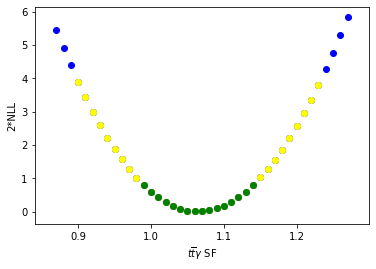

In [13]:
lkVals = []
ttgVals = np.arange(0,2.,.01)
for ttgSF in ttgVals:
    _ttg, _np, _lk = maximizeLikelihood(fitData, ttgSF = ttgSF, nSteps=50)
    lkVals.append(-2*np.log(_lk/mxLk))

lkVals = np.array(lkVals)

plt.scatter(ttgVals[lkVals<6],lkVals[lkVals<6],color='blue')
plt.scatter(ttgVals[lkVals<4],lkVals[lkVals<4],color='yellow')
plt.scatter(ttgVals[lkVals<1],lkVals[lkVals<1],color='green')
plt.ylabel("2*NLL")
plt.xlabel("$t\overline{t}\gamma$ SF")

ttgVals2Sig = ttgVals[lkVals<5]




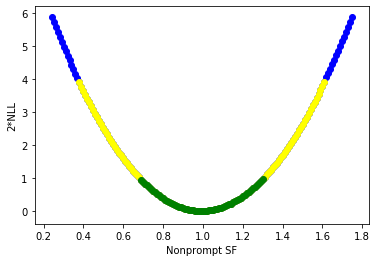

In [14]:
lkVals = []
npVals = np.arange(0,2.,.01)
for npSF in npVals:
    _ttg, _np, _lk = maximizeLikelihood(fitData, nonPromptSF= npSF, nSteps=50)
    lkVals.append(-2*np.log(_lk/mxLk))

lkVals = np.array(lkVals)

plt.scatter(npVals[lkVals<6],lkVals[lkVals<6],color='blue')
plt.scatter(npVals[lkVals<4],lkVals[lkVals<4],color='yellow')
plt.scatter(npVals[lkVals<1],lkVals[lkVals<1],color='green')
plt.ylabel("2*NLL")
plt.xlabel("Nonprompt SF")

npVals2Sig = npVals[lkVals<5]




In [15]:
lkVals = []
for npSF in npVals2Sig:
    _lkVals = []
    for ttg in ttgVals2Sig:
        _ttg, _np, _lk = maximizeLikelihood(fitData, ttgSF= ttg, nonPromptSF= npSF, nSteps=1)
        _lkVals.append(-2*np.log(_lk/mxLk))
    lkVals.append(_lkVals)
lkVals = np.array(lkVals)

1.0633528709411622 and 1.0002678871154786


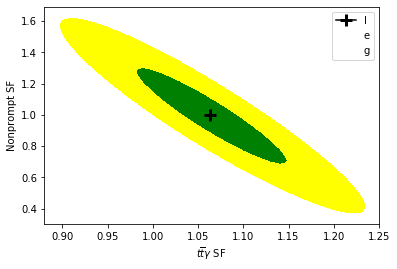

In [16]:
plt.contourf(ttgVals2Sig, npVals2Sig, lkVals, [0,1,4],colors=['green','yellow'])
plt.plot(bestTTGSF, bestNPSF,marker='+',color='black',markersize=12,markeredgewidth=3);
print(str(bestTTGSF) + ' and ' + str(bestNPSF))
plt.xlabel("$t\overline{t}\gamma$ SF")
plt.ylabel("Nonprompt SF")
plt.legend("legend")

In [22]:
print('systematics  value')
for syst in systematics: 
    print(str(MisIDSFResults[syst]) + '     ' + syst)

systematics  value
2.3498321300385556     FSRDown
2.341534579002816     FSRUp
2.3442516788252417     ISRDown
2.344376421273876     ISRUp
2.448899306536249     JERDown
2.1308158113531346     JERUp
2.549524643260984     JESDown
2.267964564377241     JESUp
2.3441942041615627     PDFDown
2.343570032047835     PDFUp
2.3451831071014695     Q2ScaleDown
2.3405761092130035     Q2ScaleUp
2.3368129349022135     btagWeight_heavyDown
2.3509394202833396     btagWeight_heavyUp
2.3351746959672868     btagWeight_lightDown
2.3527114812113936     btagWeight_lightUp
2.375145371753808     eleEffWeightDown
2.313359597946592     eleEffWeightUp
2.3439213465678335     muEffWeightDown
2.3439213465678335     muEffWeightUp
2.5952118253015213     puWeightDown
2.1192086952747546     puWeightUp
